# E-Commerce Data Analysis - Refactored

This notebook provides a comprehensive analysis of e-commerce data including:
- Revenue trends and growth metrics
- Product category performance
- Geographic sales distribution
- Customer satisfaction metrics
- Delivery performance analysis

## 1. Configuration and Imports

In [1]:
# Configuration constants
ANALYSIS_YEAR = 2023
COMPARISON_YEAR = 2022
DATA_PATH = 'ecommerce_data/'

In [2]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from data_loader import EcommerceDataLoader
from business_metrics import BusinessMetrics

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## 2. Data Loading

In [3]:
# Initialize data loader
loader = EcommerceDataLoader(data_path=DATA_PATH)

# Load all datasets
datasets = loader.load_all_data()
orders = datasets['orders']
order_items = datasets['order_items']
products = datasets['products']
customers = datasets['customers']
reviews = datasets['reviews']

print(f"Loaded {len(datasets)} datasets successfully")
print(f"Orders: {len(orders):,} rows")
print(f"Order Items: {len(order_items):,} rows")
print(f"Products: {len(products):,} rows")
print(f"Customers: {len(customers):,} rows")
print(f"Reviews: {len(reviews):,} rows")

Loaded 5 datasets successfully
Orders: 10,000 rows
Order Items: 16,047 rows
Products: 6,000 rows
Customers: 8,000 rows
Reviews: 6,571 rows


## 3. Data Processing

In [4]:
# Process sales data (filters delivered orders and adds temporal features)
sales_delivered = loader.process_sales_data(orders, order_items, status_filter='delivered')

print(f"Total delivered orders: {len(sales_delivered):,}")
print(f"Year range: {sales_delivered['year'].min()} - {sales_delivered['year'].max()}")
sales_delivered.head(3)

Total delivered orders: 15,095
Year range: 2021 - 2024


,order_id,order_item_id,product_id,price,order_status,order_purchase_timestamp,order_delivered_customer_date,month,year
2,ord_5fa044951857e02fd1347b47,1,prod_9b6f1793388ae983f852d189,111.91,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,4,2023
3,ord_5fa044951857e02fd1347b47,2,prod_c7b5997a4d0061a9f50e874c,878.42,delivered,2023-04-24 13:05:32.579655,2023-05-01 02:05:32.579655,4,2023
4,ord_0a02a8a1d3d282380ed7d0cc,1,prod_d5f7b6e420ea5cffc504ab21,1030.31,delivered,2022-05-15 07:51:22.471390,2022-05-23 01:51:22.471390,5,2022


In [5]:
# Add year column to orders for filtering
orders['year'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.year

## 4. Key Business Metrics

In [6]:
# Initialize metrics calculator
metrics = BusinessMetrics(analysis_year=ANALYSIS_YEAR, comparison_year=COMPARISON_YEAR)

# Calculate summary metrics
summary = metrics.get_summary_metrics(sales_delivered)

# Display key metrics
print("=" * 60)
print(f"BUSINESS METRICS SUMMARY - {ANALYSIS_YEAR}")
print("=" * 60)
print(f"\nRevenue Performance:")
print(f"  Total Revenue:        ${summary['total_revenue']:,.2f}")
print(f"  YoY Revenue Growth:   {summary['revenue_growth']:.2%}")
print(f"  Avg Monthly Growth:   {summary['avg_monthly_growth']:.2%}")
print(f"\nOrder Metrics:")
print(f"  Total Orders:         {summary['total_orders']:,}")
print(f"  YoY Order Growth:     {summary['order_growth']:.2%}")
print(f"  Avg Order Value:      ${summary['avg_order_value']:,.2f}")
print(f"  YoY AOV Growth:       {summary['aov_growth']:.2%}")
print("=" * 60)

BUSINESS METRICS SUMMARY - 2023

Revenue Performance:
  Total Revenue:        $3,360,294.74
  YoY Revenue Growth:   -2.46%
  Avg Monthly Growth:   -0.39%

Order Metrics:
  Total Orders:         4,635
  YoY Order Growth:     -2.40%
  Avg Order Value:      $724.98
  YoY AOV Growth:       -0.06%


## 5. Revenue Trend Analysis

In [7]:
# Create monthly revenue trend chart
fig = metrics.create_monthly_revenue_chart(sales_delivered, year=ANALYSIS_YEAR)
fig.show()

In [8]:
# Create month-over-month growth chart
fig = metrics.create_monthly_growth_chart(sales_delivered, year=ANALYSIS_YEAR)
fig.show()

## 6. Product Category Analysis

In [9]:
# Merge sales with product categories
sales_categories = loader.merge_sales_with_categories(
    sales_delivered[sales_delivered['year'] == ANALYSIS_YEAR],
    products
)

# Display top categories by revenue
top_categories = (
    sales_categories
    .groupby('product_category_name')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(f"\nTop 10 Product Categories by Revenue - {ANALYSIS_YEAR}:")
print("=" * 60)
for i, (category, revenue) in enumerate(top_categories.items(), 1):
    print(f"{i:2d}. {category:30s} ${revenue:>12,.2f}")


Top 10 Product Categories by Revenue - 2023:
 1. electronics                    $1,401,359.21
 2. home_garden                    $  862,653.27
 3. sports_outdoors                $  278,845.32
 4. automotive                     $  247,707.10
 5. clothing_shoes_jewelry         $  232,745.04
 6. toys_games                     $   70,163.64
 7. health_personal_care           $   65,370.27
 8. tools_home_improvement         $   54,280.33
 9. beauty_personal_care           $   49,213.30
10. books_media                    $   38,559.08


In [10]:
# Create category revenue chart
fig = metrics.create_category_revenue_chart(sales_categories, top_n=10)
fig.show()

## 7. Geographic Analysis

In [11]:
# Merge sales with customer location data
sales_states = loader.merge_sales_with_customers(
    sales_delivered[sales_delivered['year'] == ANALYSIS_YEAR],
    orders,
    customers
)

# Display top states by revenue
top_states = (
    sales_states
    .groupby('customer_state')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(f"\nTop 10 States by Revenue - {ANALYSIS_YEAR}:")
print("=" * 50)
for i, (state, revenue) in enumerate(top_states.items(), 1):
    print(f"{i:2d}. {state:5s} ${revenue:>12,.2f}")


Top 10 States by Revenue - 2023:
 1. CA    $  537,880.74
 2. TX    $  403,303.49
 3. FL    $  310,195.84
 4. NY    $  253,111.85
 5. IL    $  185,930.89
 6. PA    $  173,260.68
 7. OH    $  157,619.72
 8. GA    $  146,414.65
 9. MI    $  132,325.60
10. NC    $  128,314.74


In [12]:
# Create interactive state revenue map
fig = metrics.create_state_revenue_map(sales_states)
fig.show()

## 8. Customer Satisfaction Analysis

In [13]:
# Add delivery metrics to sales data
sales_with_delivery = loader.add_delivery_metrics(
    sales_delivered[sales_delivered['year'] == ANALYSIS_YEAR]
)

# Merge with reviews
sales_with_reviews = sales_with_delivery.merge(
    reviews[['order_id', 'review_score']],
    on='order_id'
)

# Create unique order-level data
review_speed = sales_with_reviews[[
    'order_id', 'delivery_speed', 'review_score'
]].drop_duplicates()

# Categorize delivery speed
review_speed['delivery_time'] = review_speed['delivery_speed'].apply(
    loader.categorize_delivery_speed
)

print(f"\nCustomer Satisfaction Metrics - {ANALYSIS_YEAR}:")
print("=" * 50)
print(f"Average Review Score:     {review_speed['review_score'].mean():.2f}/5.0")
print(f"Average Delivery Time:    {review_speed['delivery_speed'].mean():.1f} days")
print(f"Total Reviews:            {len(review_speed):,}")


Customer Satisfaction Metrics - 2023:
Average Review Score:     4.10/5.0
Average Delivery Time:    8.0 days
Total Reviews:            3,225


In [14]:
# Review score distribution
fig = metrics.create_review_score_chart(review_speed)
fig.show()

In [15]:
# Delivery time impact on reviews
print("\nAverage Review Score by Delivery Speed:")
print("=" * 50)
delivery_impact = (
    review_speed
    .groupby('delivery_time')['review_score']
    .mean()
    .loc[['1-3 days', '4-7 days', '8+ days']]  # Proper ordering
)
for delivery_time, avg_score in delivery_impact.items():
    print(f"  {delivery_time:12s}: {avg_score:.2f}/5.0")


Average Review Score by Delivery Speed:
  1-3 days    : 4.19/5.0
  4-7 days    : 4.08/5.0
  8+ days     : 4.11/5.0


In [16]:
# Create delivery time vs review score chart
fig = metrics.create_delivery_time_chart(review_speed)
fig.show()

## 9. Order Status Analysis

In [17]:
# Order status distribution
status_dist = (
    orders[orders['year'] == ANALYSIS_YEAR]['order_status']
    .value_counts(normalize=True)
    .sort_values(ascending=False)
)

print(f"\nOrder Status Distribution - {ANALYSIS_YEAR}:")
print("=" * 50)
for status, pct in status_dist.items():
    print(f"  {status:15s}: {pct:.2%}")


Order Status Distribution - 2023:
  delivered      : 93.64%
  shipped        : 3.19%
  canceled       : 1.29%
  processing     : 1.19%
  pending        : 0.51%
  returned       : 0.18%


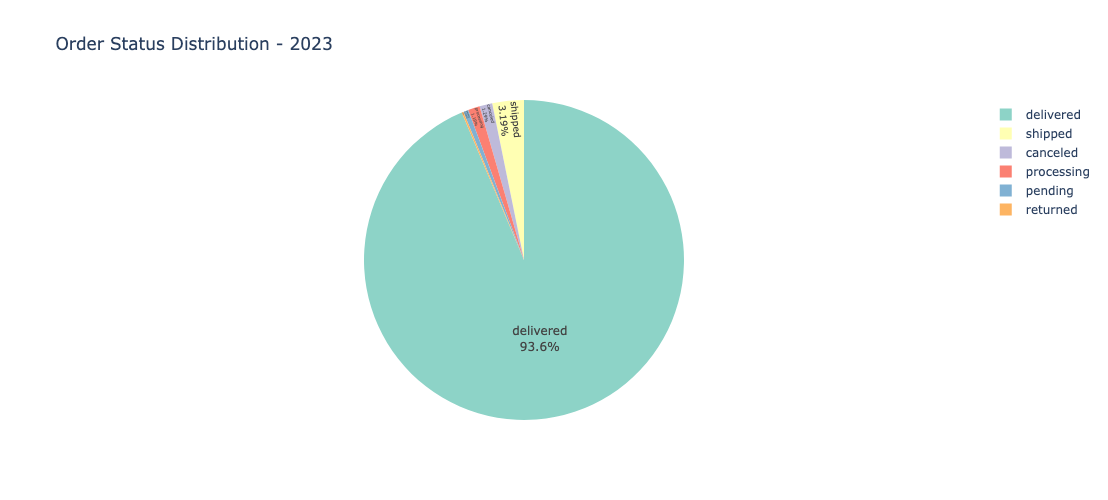

In [18]:
# Create order status pie chart
fig = metrics.create_order_status_chart(orders, year=ANALYSIS_YEAR)
fig.show()

## 10. Summary and Insights

In [19]:
print("=" * 70)
print(f"E-COMMERCE ANALYSIS SUMMARY - {ANALYSIS_YEAR}")
print("=" * 70)

print("\n1. FINANCIAL PERFORMANCE")
print(f"   - Total revenue declined {abs(summary['revenue_growth']):.2%} YoY")
print(f"   - Average order value remained stable at ${summary['avg_order_value']:,.2f}")
print(f"   - Order volume decreased {abs(summary['order_growth']):.2%} YoY")

print("\n2. PRODUCT PERFORMANCE")
top_category = sales_categories.groupby('product_category_name')['price'].sum().idxmax()
top_category_revenue = sales_categories.groupby('product_category_name')['price'].sum().max()
print(f"   - Top category: {top_category}")
print(f"   - Top category revenue: ${top_category_revenue:,.2f}")

print("\n3. GEOGRAPHIC INSIGHTS")
top_state = sales_states.groupby('customer_state')['price'].sum().idxmax()
top_state_revenue = sales_states.groupby('customer_state')['price'].sum().max()
print(f"   - Top state: {top_state}")
print(f"   - Top state revenue: ${top_state_revenue:,.2f}")

print("\n4. CUSTOMER SATISFACTION")
print(f"   - Average review score: {review_speed['review_score'].mean():.2f}/5.0")
print(f"   - Average delivery time: {review_speed['delivery_speed'].mean():.1f} days")
print(f"   - Fast delivery (1-3 days) drives higher satisfaction")

print("\n5. OPERATIONAL EFFICIENCY")
delivered_rate = status_dist['delivered'] if 'delivered' in status_dist.index else 0
print(f"   - Order fulfillment rate: {delivered_rate:.2%}")
print(f"   - Consistent monthly performance throughout the year")

print("\n" + "=" * 70)

E-COMMERCE ANALYSIS SUMMARY - 2023

1. FINANCIAL PERFORMANCE
   - Total revenue declined 2.46% YoY
   - Average order value remained stable at $724.98
   - Order volume decreased 2.40% YoY

2. PRODUCT PERFORMANCE
   - Top category: electronics
   - Top category revenue: $1,401,359.21

3. GEOGRAPHIC INSIGHTS
   - Top state: CA
   - Top state revenue: $537,880.74

4. CUSTOMER SATISFACTION
   - Average review score: 4.10/5.0
   - Average delivery time: 8.0 days
   - Fast delivery (1-3 days) drives higher satisfaction

5. OPERATIONAL EFFICIENCY
   - Order fulfillment rate: 93.64%
   - Consistent monthly performance throughout the year

